# 11110EE466000 Introduction of Reinforcement Learning Exam 3

Scoring rule:

Most of the rules are the same as the last exam.

<font color=#FF0000>

ONLY modify your code in the comment block to ensure your functions can be tested correctly.

##Required functions and library
Please run the following cells first.

In [ ]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from math import sqrt
from collections import defaultdict
from matplotlib.table import Table
import random

In [ ]:
def moving_averages(a):
  return [np.average(a[i:i+20]) for i in range(len(a)-19)]

## Problem1 variables

You may add new variables here, but do not modify the order in ACTIONS.

In [ ]:
GAMMA = 1
ALPHA = 0.1
EPSILON = 0.1
n = 5
k = 0.01
WORLD_SIZE = 6
S0 = [5, 4]
ST = [0, 5]
# left, up, right, down
ACTIONS = [[0, -1], [-1, 0], [0, 1], [1, 0]] # left, up, right, down

##Problem1(40%): Comparing Q-learning, dyna-Q and dyna-Q+ in a nonstationary environment

In this problem, you will first implement a grid world environment that changes over time. And then write algorithms for each method to compare them.



###1.1(10%): Build the environment

As shown in figure below, the envirment is a 6x6 grid world.

Initially, all the colored states are obstacles, meaning that the agent cannot enter these states.

However, the blue state (3,5) will become a legal path after the $500^{th}$ episode is reached.

(episode 0 to 499: obstacle; episode 500 to 999: path)

The agent can choose the four actions: left, up, right and down. 

Moving into the obstacles or out of the boarder will cause the agent to stay in place.

Every transition yields a reward of -1.

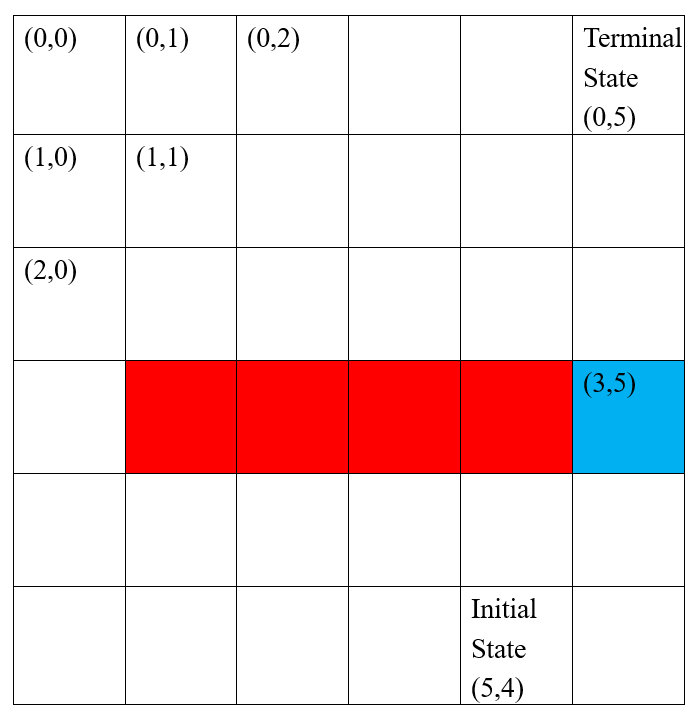

For example, 


input = [2, 1], ACTIONS[0], 200

output = [[2, 0], -1]

---
input = [1, 5], ACTIONS[2], 600

output = [[1, 5], -1]

---
input = [2, 5], ACTIONS[3], 499

output = [[2, 5], -1]

---
input = [2, 5], ACTIONS[3], 500

output = [[3, 5], -1]

---
input = [4, 5], ACTIONS[1], 499

output = [[4, 5], -1]

---
input = [4, 5], ACTIONS[1], 500

output = [[3, 5], -1]



In [ ]:
def step(state, action, episode):
  ###coed block###
  WALL = [[3,i]for i in range(1,6)]
  if episode >= 500:
    WALL = [[3,i]for i in range(1,5)]
  state_n = np.array(state) + np.array(action)
  state_n = [np.clip(state_n[0],0,5),np.clip(state_n[1],0,5)]
  state_n = state if state_n in WALL else state_n
  reward = -1  
  ################
  return [state_n, -1]

####Test your function


In [ ]:
print(step([2,1], ACTIONS[0], 200))
print(step([1,5], ACTIONS[2], 600))
print(step([2,5], ACTIONS[3], 499))
print(step([2,5], ACTIONS[3], 500))
print(step([4,5], ACTIONS[1], 499))
print(step([4,5], ACTIONS[1], 500))


[[2, 0], -1]
[[1, 5], -1]
[[2, 5], -1]
[[3, 5], -1]
[[4, 5], -1]
[[3, 5], -1]


####$\epsilon$-greedy action selection

You will use this function for the following algorithms.

In [ ]:
def chooseAction(state, qtable, epsilon):
  if rd.rand()>=epsilon:
    return np.argmax(qtable[state[0],state[1]])
  else:
    return rd.randint(qtable.shape[2])

###1.2(10%): Q-learning

Using the environment in 1.1, please implement Q-learning with $\gamma=1 $, $\alpha=0.1$ and $\epsilon=0.3$ over 1000 episodes.

The output 'returns' is a list consisting of return 'G' from each episode.

In [ ]:
def Q_learning():
  ###coed block###
  returns = []
  q_value = np.zeros([6,6,4])
  gamma = 1
  alpha = 0.1
  epsilon = 0.1
  for eps in range(1000):
    total_reward = 0
    state = S0
    num = 0
    while(state != ST):    
      action = chooseAction(state,q_value,epsilon)
      next_state,reward = step(state,ACTIONS[action],eps)
      q_value[state[0],state[1],action] = q_value[state[0],state[1],action] + alpha * (reward + gamma * np.max(q_value[next_state[0],next_state[1]]) - q_value[state[0],state[1],action])
      total_reward += reward
      state = next_state
    returns.append(total_reward)
  ################
  return returns

####test

Please make sure your code can run properly; you can check your correctness in the 'Comparison' section.

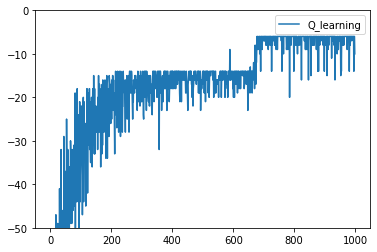

In [ ]:
plt.figure()
plt.plot(Q_learning(),label='Q_learning')
plt.ylim(-50, 0)
plt.legend()
plt.show()

###1.3(10%): dyna-Q

Using the environment in 1.1, please implement dyna-Q with $\gamma=1 $, $\alpha=0.1$, $n=5$ and $\epsilon=0.3$ over 1000 episodes.

The output 'returns' is a list consisting of return 'G' from each episode.

In [ ]:
def dyna_Q():
  qtable = np.zeros((6,6,4))
  returns = []
  model = defaultdict(dict)
  alpha = 0.1
  gamma = 1
  n = 5
  for episode in range(1000):
    epsilon = 0.1
    state = S0
    G = 0
    while state != ST:
      action = chooseAction(state,qtable,epsilon)
      next_state, reward = step(state, ACTIONS[action], episode)
      qtable[state[0]][state[1]][action] = qtable[state[0]][state[1]][action] + ALPHA*(reward + GAMMA * np.max(qtable[next_state[0]][next_state[1]]) - qtable[state[0]][state[1]][action])
      model[(state[0],state[1])][action] = [reward , (next_state[0],next_state[1])] 
      for k in range(n):
        model_s = list(model)[rd.randint(len(list(model)))]
        model_a = rd.choice(list(model[model_s].keys()))
        model_reward,model_n_state = model[model_s][model_a]
        qtable[model_s[0]][model_s[1]][model_a] = qtable[model_s[0]][model_s[1]][model_a] + ALPHA*(model_reward + GAMMA * np.max(qtable[model_n_state[0]][model_n_state[1]]) - qtable[model_s[0]][model_s[1]][model_a])
        #print(k)
      state = next_state
      G += reward
    returns.append(G)
  
    
  return returns

####test

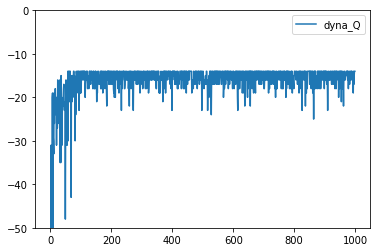

In [ ]:
plt.figure()
plt.plot(dyna_Q(),label='dyna_Q')
plt.ylim(-50, 0)
plt.legend()
plt.show()

###1.4(10%): dyna-Q+

Using the environment in 1.1, please implement dyna-Q+ with $\gamma=1 $, $\alpha=0.1$, $\epsilon=0.3$, $n=5$ and $\kappa=0.01$ over 1000 episodes.

The output 'returns' is a list consisting of return 'G' from each episode.

In [ ]:
def dyna_Q_plus():
  qtable = np.zeros((6,6,4))
  returns = []
  t_table = np.zeros([6,6,4])
  model = defaultdict(dict)
  alpha = 0.1
  gamma = 1
  n = 5
  kappa = 0.01
  t = 0
  #t在每個epsiode持續累積，越新的episode就會有越大的kappa*sqrt(tau)，也就是越大的return權重
  for episode in range(1000):
      epsilon = EPSILON
      state = S0
      G = 0
      while state != ST:
          action = chooseAction(state,qtable,epsilon)
          next_state, reward = step(state, ACTIONS[action], episode)
          qtable[state[0]][state[1]][action] = qtable[state[0]][state[1]][action] + ALPHA*(reward + GAMMA * np.max(qtable[next_state[0]][next_state[1]]) - qtable[state[0]][state[1]][action])
          model[(state[0],state[1])][action] = [reward , (next_state[0],next_state[1])]
          t_table[state[0],state[1],action]=t 
          for k in range(n):
            model_s = list(model)[rd.randint(len(list(model)))]
            model_a = rd.randint(0,4)
            #學習沒走過的新資訊
            if model_a not in list(model[model_s].keys()):
              model_reward = 0
              model_n_state = model_s
            else:
              model_reward,model_n_state = model[model_s][model_a]
            tau = t - t_table[model_s[0]][model_s[1]][model_a]
            model_reward += kappa*(tau**0.5) 
            qtable[model_s[0]][model_s[1]][model_a] = qtable[model_s[0]][model_s[1]][model_a] + ALPHA*(model_reward + GAMMA * np.max(qtable[model_n_state[0]][model_n_state[1]]) - qtable[model_s[0]][model_s[1]][model_a])

          state = next_state
          G += reward
          t += 1
      returns.append(G)
    
  return returns

####test

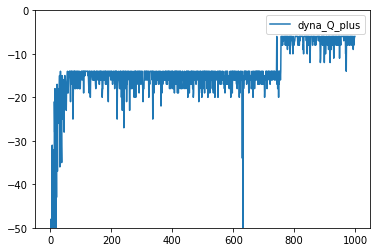

In [ ]:
plt.figure()
plt.plot(dyna_Q_plus(),label='dyna_Q_plus')
plt.ylim(-50, 0)
plt.legend()
plt.show()

###Comparison
You can check your correctness in this part.

Uncomment the lines below after you finish them.

This will take about 1.5 minutes to run.

The results:

1. Dyna_Q and dyna_Q+ will learn faster than Q-learning in the beginning.

2. Dyna_Q+ and Q-learning are more likely to find the new path after the environment changes.


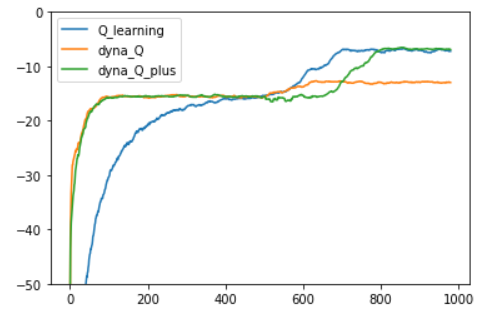

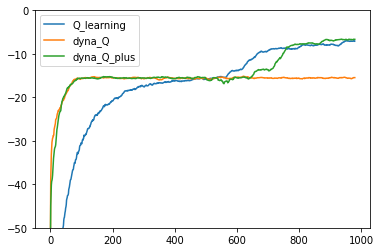

In [ ]:
plt.figure()
plt.plot(np.average([moving_averages(Q_learning()) for i in range(10)],axis=0),label='Q_learning')
plt.plot(np.average([moving_averages(dyna_Q()) for i in range(10)],axis=0),label='dyna_Q')
plt.plot(np.average([moving_averages(dyna_Q_plus()) for i in range(10)],axis=0),label='dyna_Q_plus')
plt.ylim(-50, 0)
plt.legend()
plt.show()

## Problem2(60%)  

Consider an environment having a continuous state from 0 to 1($\ 0\leq s <1 $). If the state is smaller than 0 , greater or equal to 1, the episode will be terminated. 

In each episode agent will start from an initial state, which has a Gaussian distribution with mean of 0.5 and standard deviation of 0.01.
The agent has two actions to choose: A=+0.01 and A=-0.01; each action is chosen with equal probability, and the agent transitions  to S<-S+A.

If next state is smaller than 0, the agent gets a reward of -1;
If the next state is greater than 1, the agent gets a reward of 1;
otherwise, the agent gets a reward of 0.


Please estimate the value function.
Use state aggregation as function approximator.
Use SGD as the update rule.

Use the following parameters:

Learning rate = 0.01

discounted rate =1.0

number of episodes = 1000

### 2.1(10%) discretization:

  return 0 if $\ 0.0\leq s <0.1 $

  return 1 if $\ 0.1\leq s <0.2 $

  ...

  return 9 if $\ 0.9\leq s <1.0 $



**For example**


input = 0.0

output =0

---
input = 0.01

output = 0

---
input = 0.1

output = 1

---
input = 0.19

output = 1

---
input = 0.8

output = 8

---
input = 0.9

output = 9

In [ ]:
alpha = 0.1
gamma = 1
tiling1 = np.zeros(10)

In [ ]:
def s2idx(s):
  ###coed block###
  idx1 = 0
  if s>=0.0 and s<0.1:
    idx1=0
  elif s>=0.1 and s<0.2:
    idx1=1
  elif s>=0.2 and s<0.3:
    idx1=2
  elif s>=0.3 and s<0.4:
    idx1=3
  elif s>=0.4 and s<0.5:
    idx1=4
  elif s>=0.5 and s<0.6:
    idx1=5
  elif s>=0.6 and s<0.7:
    idx1=6
  elif s>=0.7 and s<0.8:
    idx1=7
  elif s>=0.8 and s<0.9:
    idx1=8
  elif s>=0.9 and s<1.0:
    idx1=9
  elif s >= 1 or s < 0:
    idx1 = 10
  ################
  return idx1

####Test your function

In [ ]:
print([s2idx(s) for s in [0,0.01,0.1,0.19,0.8,0.9]])

[0, 0, 1, 1, 8, 9]


In [ ]:
def step(s,a):
    
  next_s = 0
  if a == 0:
    next_s = s + 0.01
  else:
    next_s = s - 0.01
      
  #reward
  if next_s >= 1:
    reward = 1
  elif next_s < 0:
    reward = -1
  else:
    reward = 0
      
  return next_s , reward

In [ ]:
def chooseAct():
    
  if rd.rand() < 0.5:
    action = 0
  else:
    action = 1

  return action

### 2.2(5%) evaluate state value:

Use your approximator to evaluate state value.

In [ ]:
def v(s):
  ###coed block###
  #轉換離散
  state_value = tiling1[s2idx(s)]
  ################
  return  state_value

### 2.3(10%) SGD update rule:

Update your function approximator in the following function

In [ ]:
def update_v(s,r,s_):
  ###coed block###
  coded_state = s2idx(s)
  coded_next_state = s2idx(s_)
  #print(coded_next_state)
  val_state = v(s)
  if coded_next_state == 10:
    tiling1[coded_state] += alpha * (r - val_state)
  else:
    tiling1[coded_state] += alpha * (r + gamma * v(s_) - val_state)
  ################

### 2.4(10%) result

Complete the environment and then update the state value to get the similiar result.

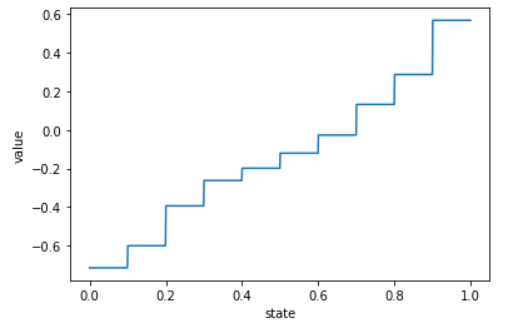

In [ ]:
for _ in range(1000):
  state = rd.normal(0.5,0.01)
  while state >=0 and state < 1:
    action = chooseAct()
    next_state, reward = step(state,action)
    update_v(state,reward,next_state)
    state = next_state

Text(0, 0.5, 'value')

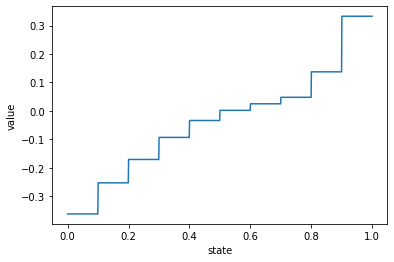

In [ ]:
from matplotlib import pyplot as plt
x = np.linspace(0.0000,0.9999,1000)
y = [v(xi) for xi in x]
plt.plot(x,y)
plt.xlabel("state")
plt.ylabel("value")

###2.5(10%) discretization of 2 tilings

In tiling1:

  return 0 if $\ 0.0\leq s <0.2 $

  return 1 if $\ 0.2\leq s <0.4 $

  ...

  return 4 if $\ 0.8\leq s <1.0 $

----------------------------------------------------
In tiling2:

  return 0 if $\ -0.1\leq s <0.1 $

  return 1 if $\ 0.1\leq s <0.3 $

  ...

  return 4 if $\ 0.7\leq s <0.9 $

  return 5 if $\ 0.9\leq s <1.1 $

  
**For example**


input = 0.0

output =[0,0]

---
input = 0.19

output = [0,1]

---
input = 0.2

output = [1,1]

---
input = 0.7

output = [3,4]

---
input = 0.8

output = [4,4]

---
input = 0.9

output = [4,5]

In [ ]:
import numpy as np
alpha=0.1
tiling1 = np.zeros(5)
tiling2 = np.zeros(6)

In [ ]:
def s2idx_2(s):
  # initailization
  idx1=0
  idx2=0

  if s >= 0 and s < 0.2:
    idx1=0
  elif s >= 0.2 and s < 0.4:
    idx1=1
  elif s >= 0.4 and s < 0.6:
    idx1=2
  elif s >= 0.6 and s < 0.8:
    idx1=3
  elif s >= 0.8 and s < 1:
    idx1=4
  

  if s >= -0.1 and s < 0.1:
    idx2=0
  elif s >= 0.1 and s < 0.3:
    idx2=1
  elif s >= 0.3 and s < 0.5:
    idx2=2
  elif s >= 0.5 and s < 0.7:
    idx2=3
  elif s >= 0.7 and s < 0.9:
    idx2=4
  elif s >= 0.9 and s < 1.1:
    idx2=5

  return [idx1,idx2]

####Test your function

In [ ]:
print([s2idx_2(s) for s in [0,0.19,0.2,0.7,0.8,0.91]])

[[0, 0], [0, 1], [1, 1], [3, 4], [4, 4], [4, 5]]


### 2.6(5%) evaluate state value using 2 tilings:
Use your approximator to evaluate state value

In [ ]:
def v_2(s):
  ###coed block###
  index = s2idx_2(s)
  state_value = tiling1[index[0]] + tiling2[index[1]]
  ################
  return state_value

### 2.7(10%) SGD update rule using 2 tilings:

Update your function approximator in following function

In [ ]:
def update_v_2(s,r,s_):
  ###coed block###
  coded_state = s2idx_2(s)
  val_state = v_2(s)
  
  if s_ >= 1 or s_ < 0: 
    tiling1[coded_state[0]] += alpha * (r - val_state)
    tiling2[coded_state[1]] += alpha * (r - val_state)
  else:
    tiling1[coded_state[0]] += alpha * (r + gamma * v_2(s_) - val_state)
    tiling2[coded_state[1]] += alpha * (r + gamma * v_2(s_) - val_state)
  ################

### 2.8(10%) result of 2 tilings:
Complete the environment and then update the state value to get the similiar result.

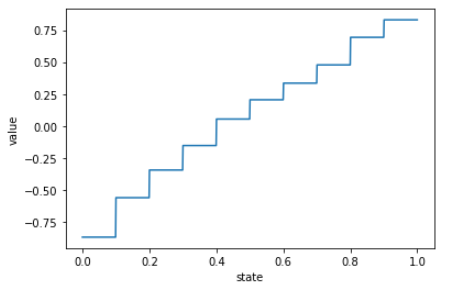

In [ ]:
for _ in range(1000):
  state = rd.normal(0.5,0.01)
  while state >= 0 and state < 1:
    action = chooseAct()
    next_state, reward = step(state,action)
    update_v_2(state,reward,next_state)
    state = next_state

Text(0, 0.5, 'value')

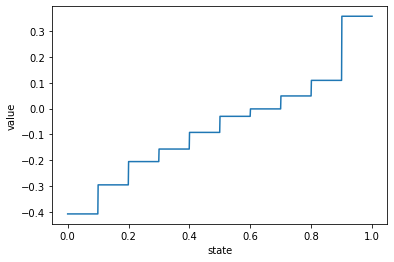

In [ ]:
from matplotlib import pyplot as plt
x = np.linspace(0.0,0.9999,1000)
y = [v_2(xi) for xi in x]
plt.plot(x,y)
plt.xlabel("state")
plt.ylabel("value")